In [1]:
import os
import sys

# 現在のディレクトリを取得
current_dir = os.getcwd()

# 一つ前のディレクトリを取得(srcディレクトリへのpathを作成するため)
project_dir = os.path.dirname(current_dir)

# 'src'ディレクトリへのパスを作成
src_dir = os.path.join(project_dir, 'src')

# 'src'ディレクトリのpathをPythonのパスに追加
sys.path.append(src_dir)

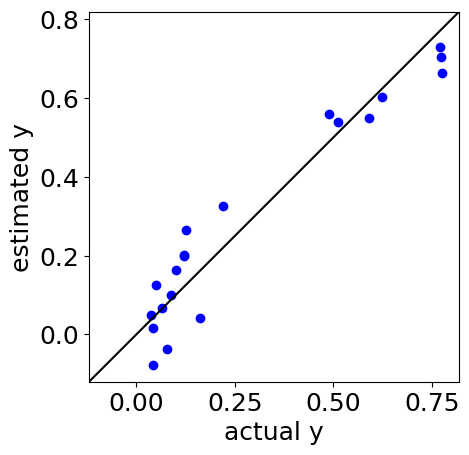

r^2 for training data : 0.9190600238137889
RMSE for training data : 0.07820740542117051
MAE for training data : 0.0664516783215491


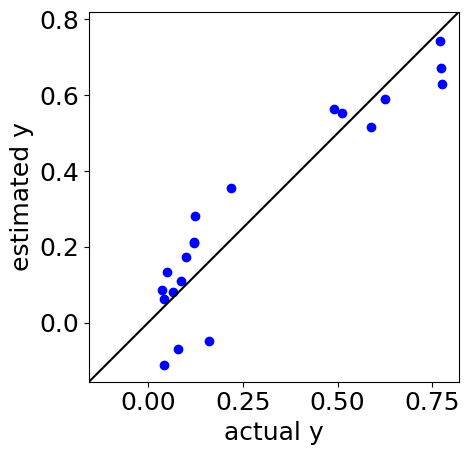

r^2 in cross-validation : 0.861112801594846
RMSE in cross-validation : 0.10244657668517834
MAE in cross-validation : 0.08721465545392643

トレーニングデータにおけるサポートベクター数 : 10
トレーニングデータにおけるサポートベクターの割合 : 0.5

トレーニングデータにおける外れサンプル数 : 4
トレーニングデータにおける外れサンプルの割合 : 0.2

テストデータにおける外れサンプル数 : 4334
テストデータにおける外れサンプルの割合 : 0.447265221878225


In [2]:
import models
import features
import validation
import numpy as np

# ols線形重回帰分析
regression_method = 'ols_liner'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction, x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.ols_linear(autoscaled_x, autoscaled_y, x)


validate = validation.validate_model(regression_method, model, 10, autoscaled_x, autoscaled_y, x, y)

# 予測
estimated_y_prediction = models.predict(regression_method, model, autoscaled_x_prediction, x_prediction, y)



# AD
ad_method = 'ocsvm'
k_in_knn = 5  # k-NN における k
ocsvm_nu = 0.04  # OCSVM における ν。トレーニングデータにおけるサンプル数に対する、サポートベクターの数の下限の割合
ocsvm_gamma = 0.1  # OCSVM における γ
ocsvm_gammas = 2 ** np.arange(-20, 11, dtype=float)  # γ の候補
rate_of_training_samples_inside_ad = 0.96  # AD 内となるトレーニングデータの割合。AD　のしきい値を決めるときに使用

ad = models.ad(ad_method, autoscaled_x, x, x_prediction, autoscaled_x_prediction, k_in_knn, rate_of_training_samples_inside_ad, estimated_y_prediction, ocsvm_gamma, ocsvm_gammas, ocsvm_nu)

In [2]:
import models
import features
import validation

# ols非線形重回帰分析
regression_method = 'ols_nonlinear'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.ols_nonlinear(autoscaled_x, autoscaled_y, x)

# validation
validate = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)

# 予測
predict = models.predict(regression_method, model, autoscaled_x_prediction, x_prediction, y)

# 非線形変換を戻す
x = x_tmp.copy()
x_prediction = x_prediction_tmp.copy()
# 標準偏差が 0 の特徴量の削除
deleting_variables = x.columns[x.std() == 0]
x = x.drop(deleting_variables, axis=1)
x_prediction = x_prediction.drop(deleting_variables, axis=1)    
# オートスケーリング
autoscaled_x = (x - x.mean()) / x.std()
autoscaled_x_prediction = (x_prediction - x.mean()) / x.std()

ModuleNotFoundError: No module named 'models'

In [ ]:
import models
import features
import validation

# svr_linear線形重回帰分析
regression_method = 'svr_linear'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.svr_linear(10,autoscaled_x, autoscaled_y, x)

# 予測
predict = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)


In [ ]:
import models
import features
import validation

# svr_linear線形重回帰分析
regression_method = 'svr_gaussian'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.svr_gaussian(10,autoscaled_x, autoscaled_y, y)

# 予測
predict = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)

/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


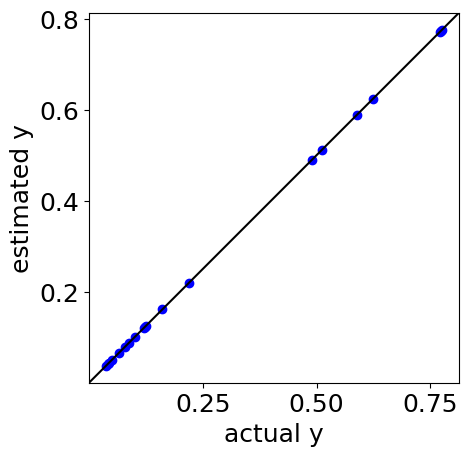

/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


r^2 for training data : 0.9999999999310839
RMSE for training data : 2.2820572787259627e-06
MAE for training data : 1.7045444726523224e-06


/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamazakihiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/yamaza

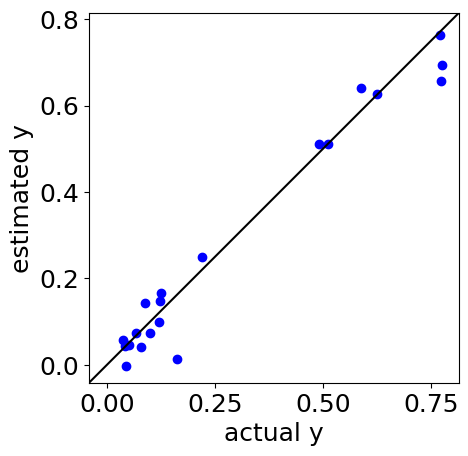

r^2 in cross-validation : 0.9623608266730129
RMSE in cross-validation : 0.05333181699724934
MAE in cross-validation : 0.0372921191713378


In [2]:
import models
import features
import validation

# ガウス過程回帰(最初にカーネル関数を選択する)
regression_method = 'gpr_one_kernel'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.gpr_one_kernel(2,autoscaled_x, autoscaled_y, x)

# 予測
predict = validation.validate_model(regression_method, model,10, autoscaled_x, autoscaled_y, x, y)


In [ ]:
import models
import features
import validation

# ガウス過程回帰(最初にカーネル関数を選択する)
regression_method = 'gpr_kernels'

# 特徴量をモデリングように変換
x,y,autoscaled_x, autoscaled_y, autoscaled_x_prediction= features.build_features(regression_method,'./../data/candidate/remaining_samples.csv','./../data/raw/resin.csv')

# モデル構築
model = models.gpr_kernels(10,autoscaled_x, autoscaled_y, x, y)

# 予測
predict = validation.validate_model(regression_method, model, 10, autoscaled_x, autoscaled_y, x, y)
